In [2]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np

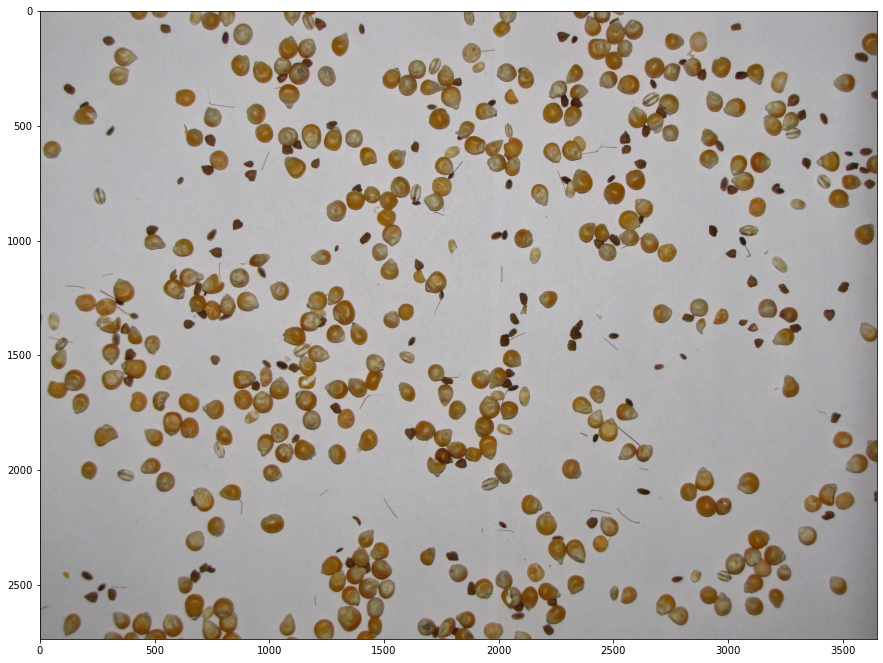

In [3]:
img2 = cv2.imread('D:/projects/CornClassifier/resources/IMG_4324.JPG')
img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,20))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

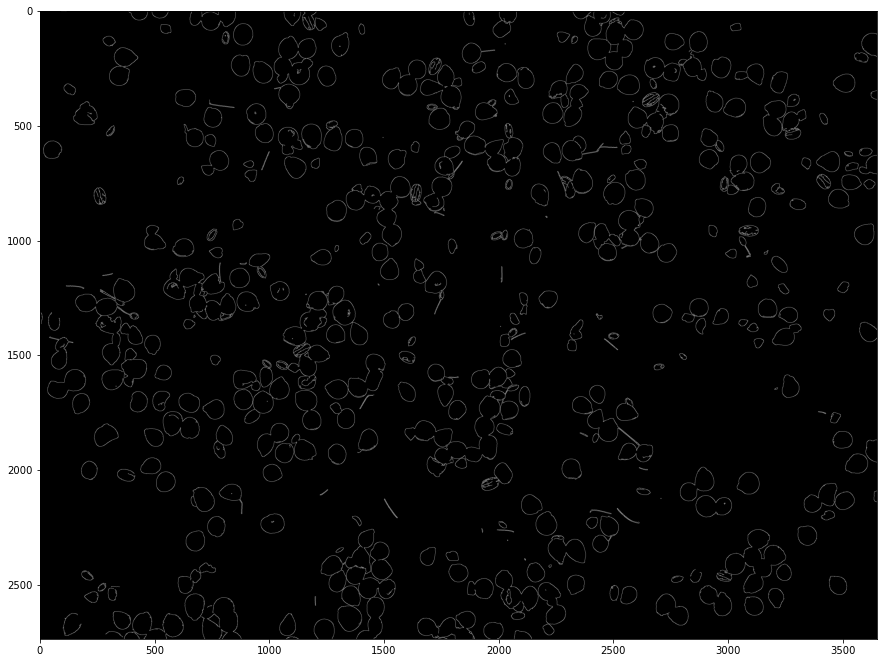

In [4]:
b_filter = cv2.bilateralFilter(img, 25, 15, 10)
edges = cv2.Canny(b_filter, 50, 175)
plt.figure(figsize=(15,20))
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

In [5]:
contours = cv2.findContours(edges.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
contours = imutils.grab_contours(contours)


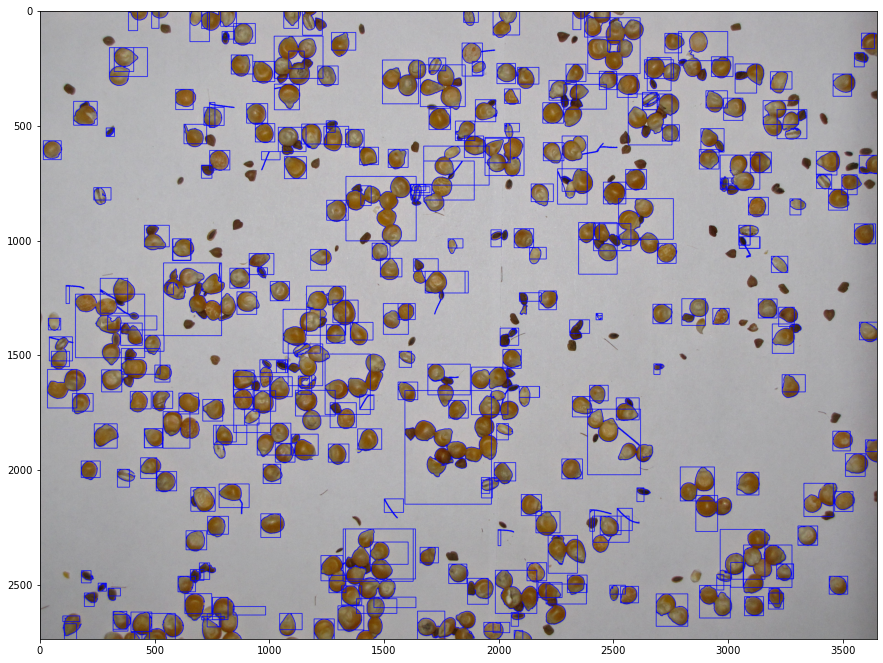

In [6]:
img_2 = img2.copy()
for c in contours:
    (x,y,w,h) = cv2.boundingRect(c)
    perimetr = cv2.arcLength(c, True)
    if perimetr < 14300 and perimetr > 200:
        cv2.rectangle(img_2, (x, y), (x + h, y + w), (255, 0, 0), 2)
        cv2.drawContours(img_2, c, -1, (255, 0, 0), 2)
plt.figure(figsize=(15,20))
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))

Попытка выделить только нужное №2

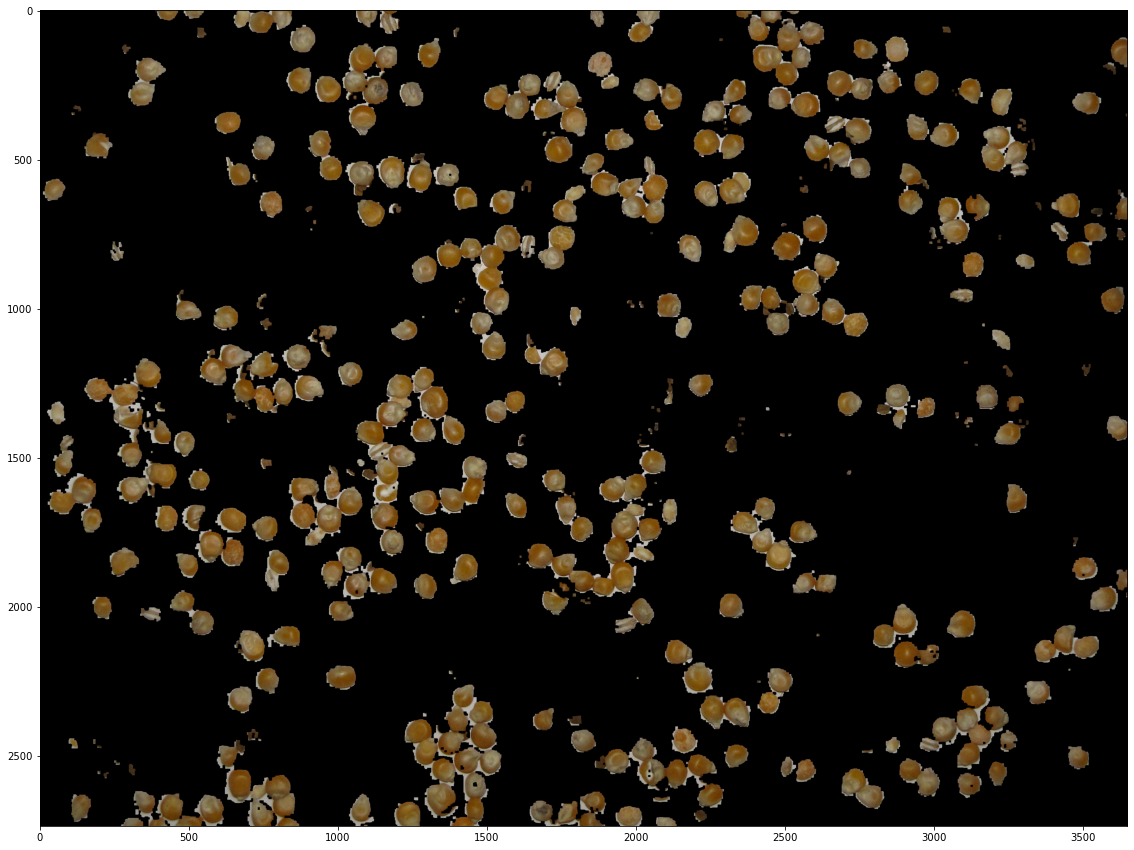

In [68]:
hsv = cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)
yellow_lower = np.array([15, 10, 30])
yellow_upper = np.array([25, 255, 255])
mask_yellow = cv2.inRange(hsv, yellow_lower, yellow_upper)

kernel = np.ones((7,7),np.uint8)
mask_yellow = cv2.morphologyEx(mask_yellow, cv2.MORPH_CLOSE, kernel)
mask_yellow = cv2.morphologyEx(mask_yellow, cv2.MORPH_OPEN, kernel)

segmented_img = cv2.bitwise_and(img2, img2, mask=mask_yellow)
plt.figure(figsize=(20, 15))
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))

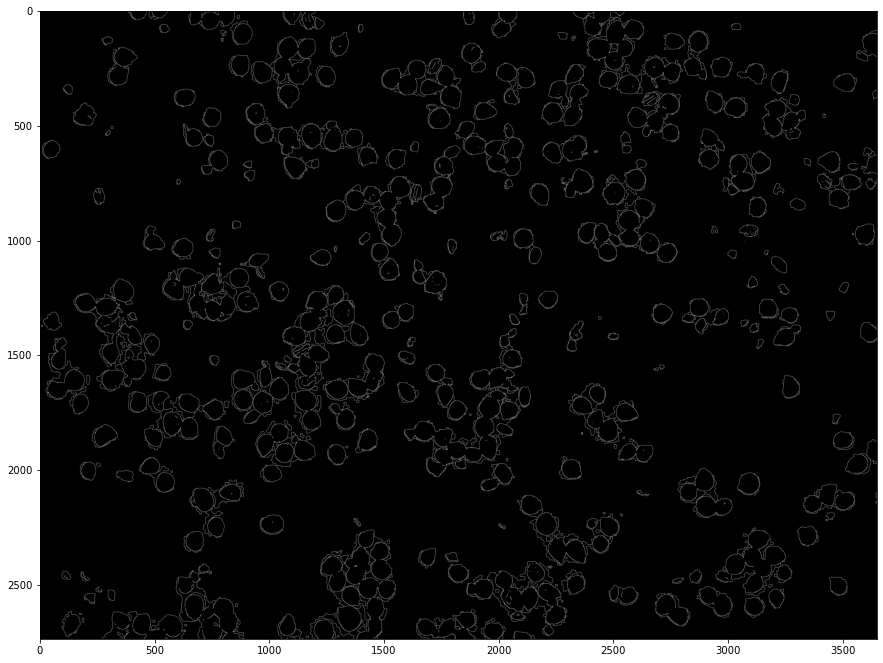

In [53]:
b_filter = cv2.bilateralFilter(segmented_img, 25, 15, 10)
edges = cv2.Canny(b_filter, 180, 255)
plt.figure(figsize=(15,20))
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

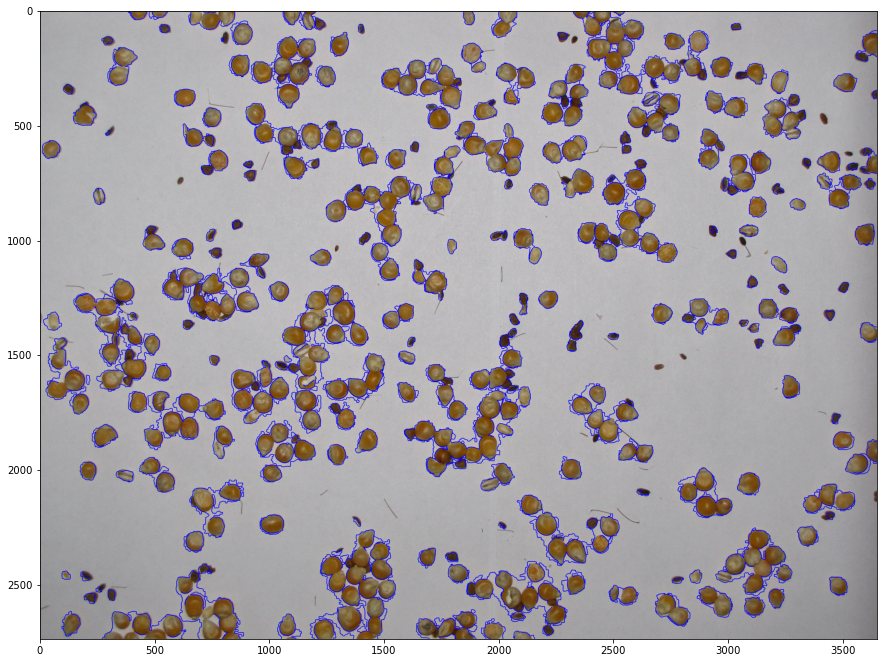

In [54]:
img_2 = img2.copy()
contours = cv2.findContours(edges.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
contours = imutils.grab_contours(contours)

for c in contours:
    (x,y,w,h) = cv2.boundingRect(c)
    perimetr = cv2.arcLength(c, True)
    if perimetr < 14300 and perimetr > 100:
#         cv2.rectangle(img_2, (x, y), (x + h, y + w), (255, 0, 0), 2)
        cv2.drawContours(img_2, c, -1, (255, 0, 0), 2)
plt.figure(figsize=(15,20))
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))